## Heart Disease Prediction


In [2]:
import os
os.getcwd()

'F:\\Python Learning\\Imarticus\\Projects\\Decision Tree'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('HeartDisease.csv')
df.shape

(303, 14)

In [6]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [10]:
y = df.iloc[:,-1]
X = df.iloc[:,0:-1]

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 1)

In [41]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [58]:
dt_ent = DecisionTreeClassifier(max_depth=5,min_samples_split=25)
dt_ent.fit(X_train_scaled,y_train)
pred = dt_ent.predict(X_train_scaled)

In [59]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       103
           1       0.88      0.91      0.89       124

    accuracy                           0.88       227
   macro avg       0.88      0.88      0.88       227
weighted avg       0.88      0.88      0.88       227



In [60]:
print(classification_report(y_test, dt_ent.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        35
           1       0.75      0.73      0.74        41

    accuracy                           0.72        76
   macro avg       0.72      0.72      0.72        76
weighted avg       0.72      0.72      0.72        76



## With Gini Index Criteria

In [61]:
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X_train,y_train)
pred = dt_gini.predict(X_train)

In [62]:
print(classification_report(y_train, dt_gini.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       124

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [63]:
print(classification_report(y_test, dt_gini.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        35
           1       0.78      0.68      0.73        41

    accuracy                           0.72        76
   macro avg       0.73      0.73      0.72        76
weighted avg       0.73      0.72      0.72        76



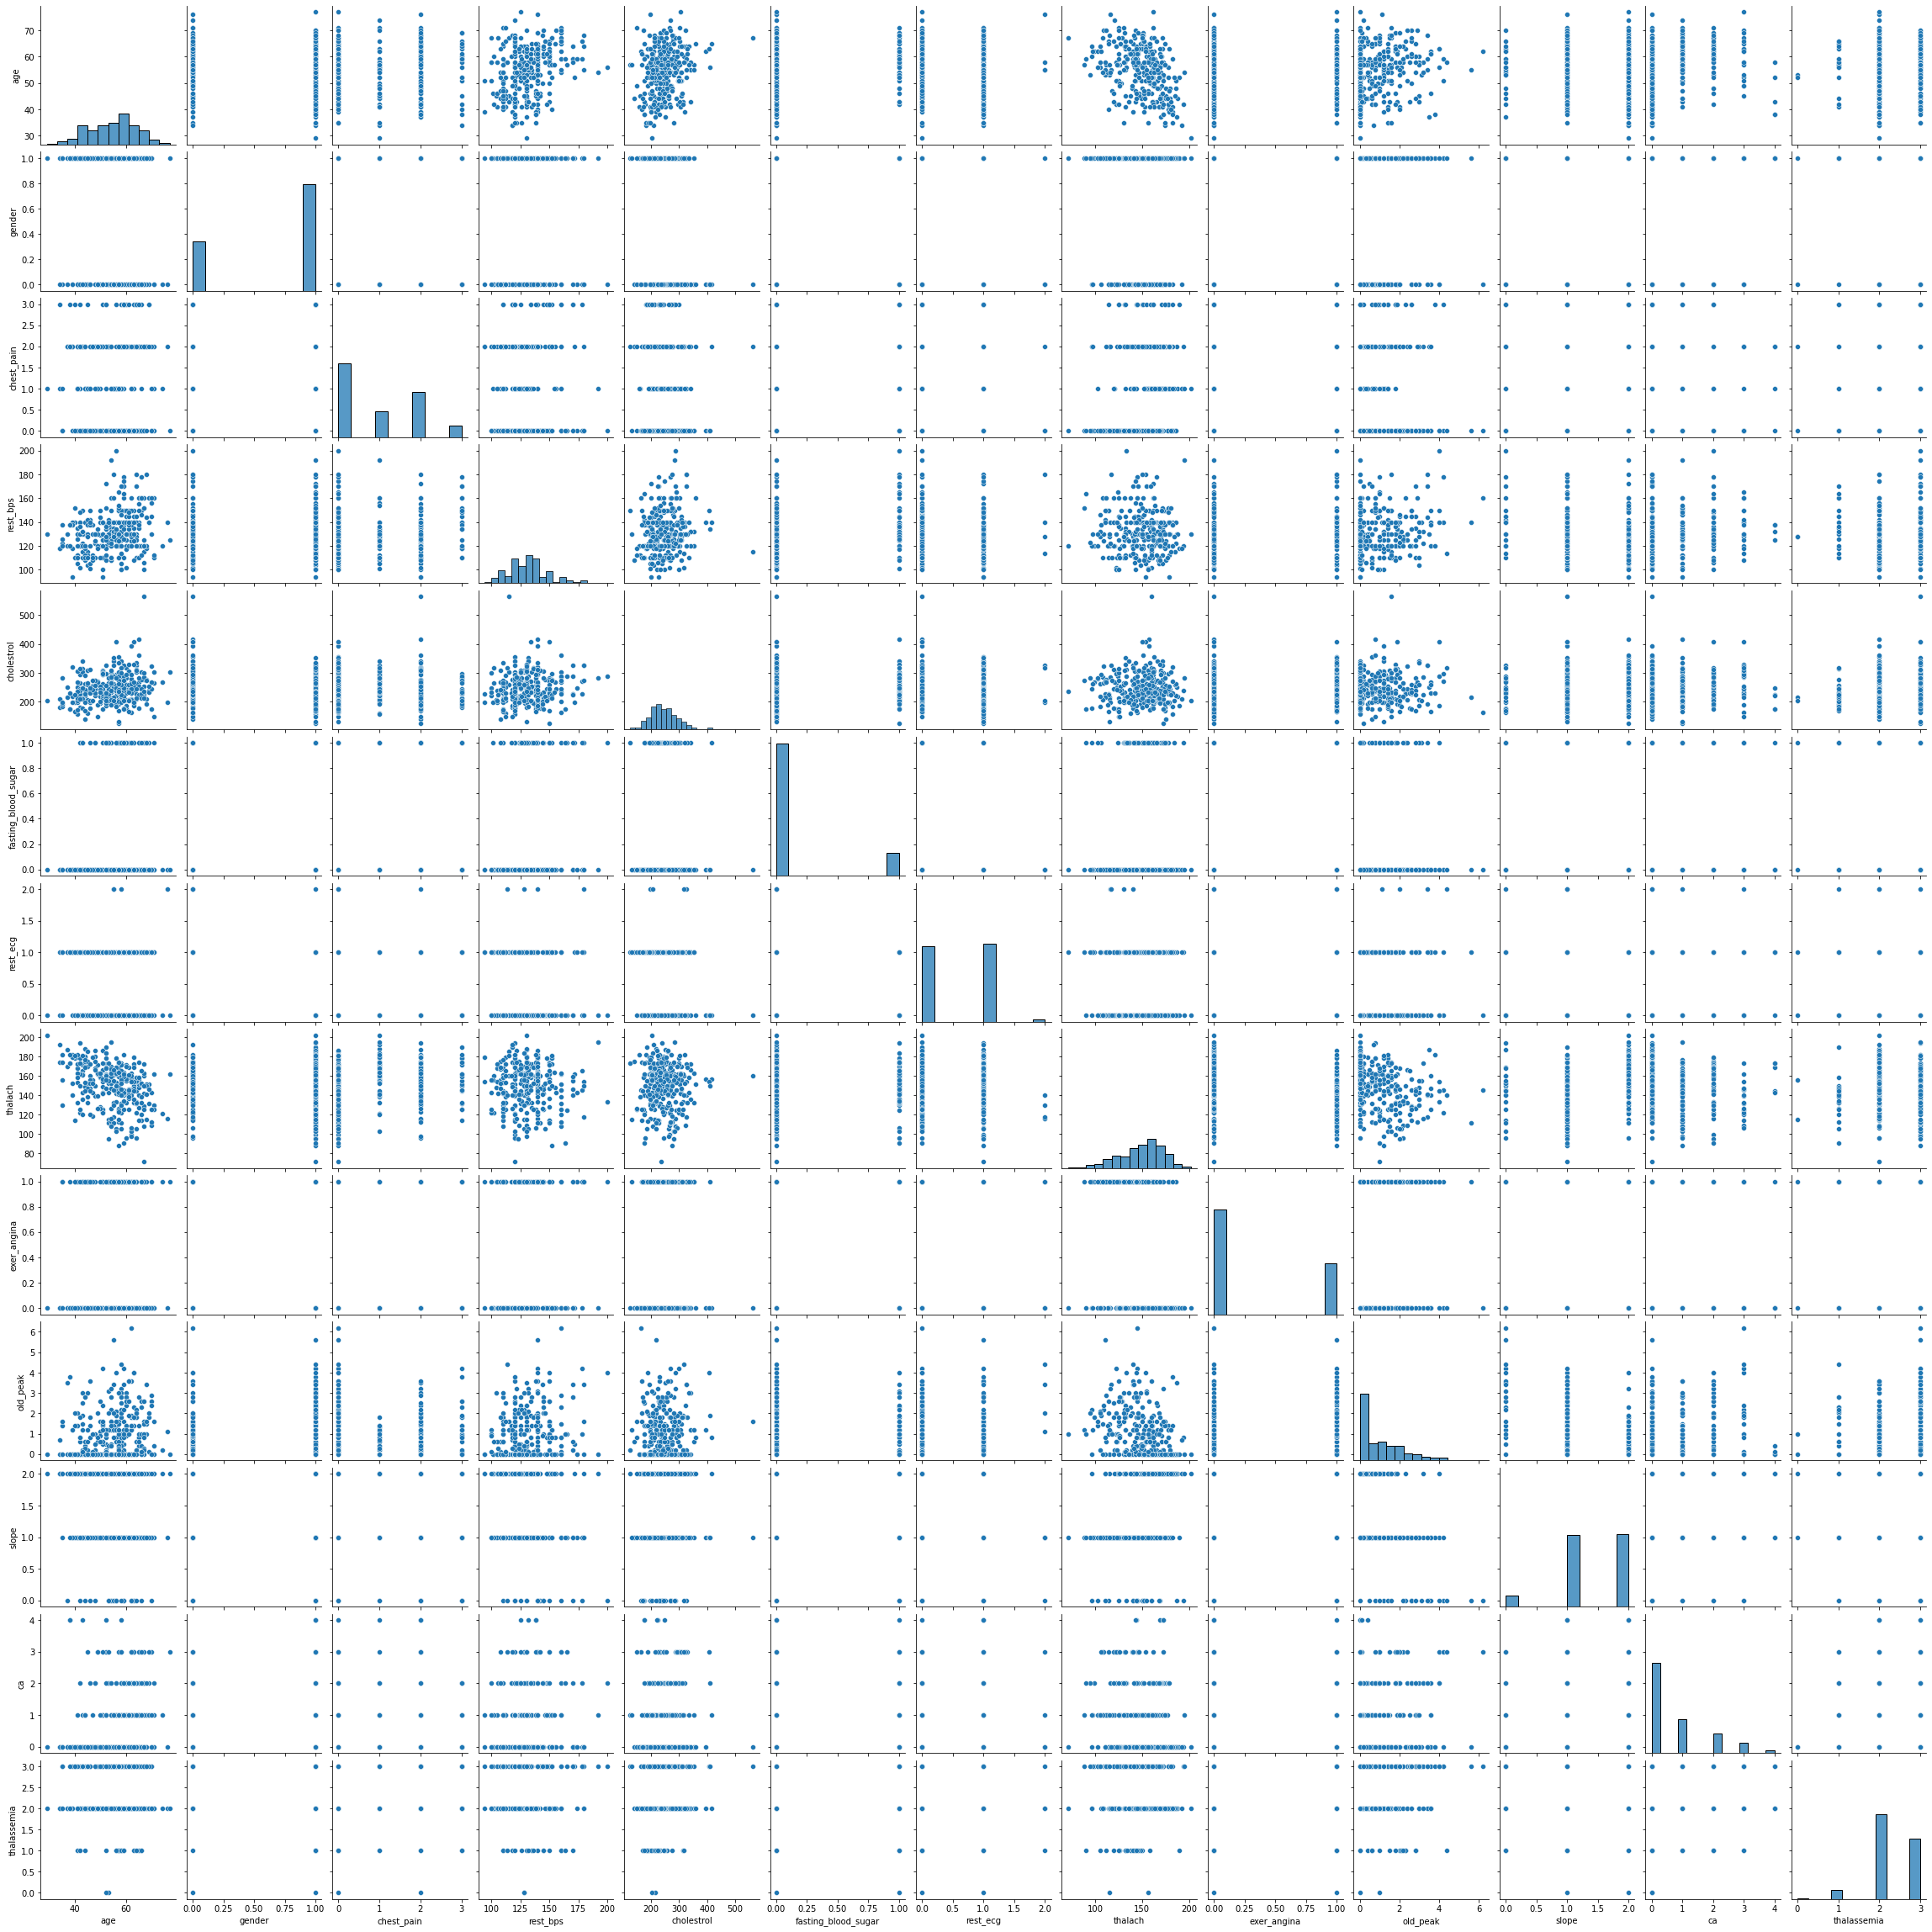

In [64]:
sns.pairplot(X)
plt.show()

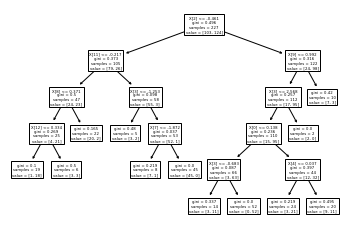

In [65]:
from sklearn.tree import plot_tree


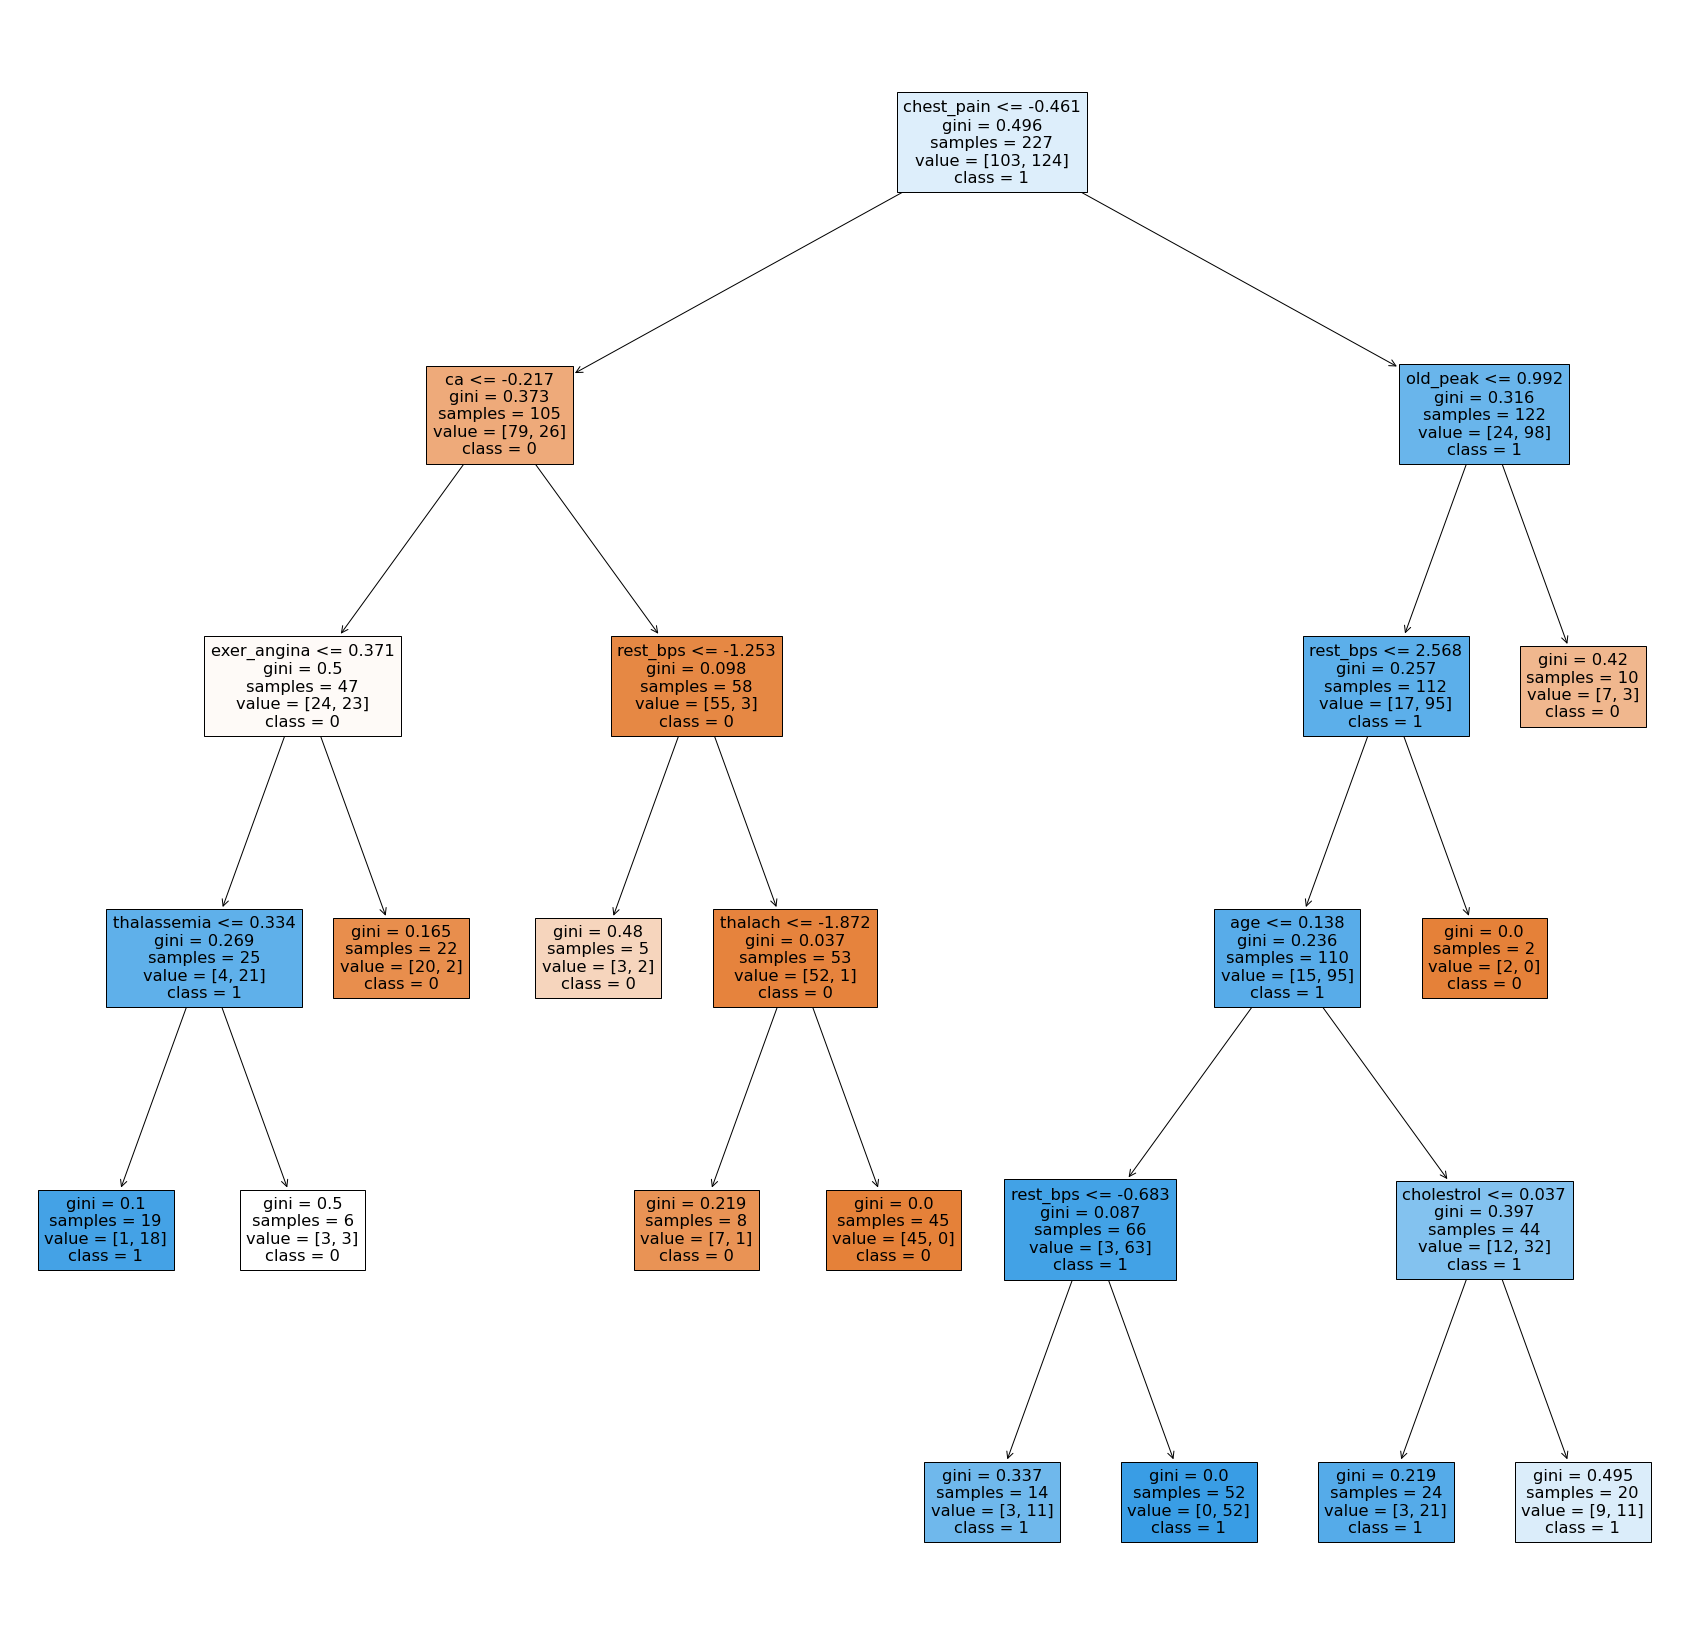

In [67]:
# save the column names in 'labels'
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = plot_tree(dt_ent, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

In [73]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select = 7, verbose=1)

In [74]:
rfe.fit(X_train,y_train)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7, verbose=1)

In [84]:
X.columns[rfe.support_]

Index(['age', 'chest_pain', 'rest_bps', 'cholestrol', 'exer_angina',
       'old_peak', 'ca'],
      dtype='object')

In [85]:
rfe.feature_names_in_

array(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina',
       'old_peak', 'slope', 'ca', 'thalassemia'], dtype=object)

In [80]:
rfe.ranking_

array([1, 3, 1, 1, 1, 7, 5, 2, 1, 1, 6, 1, 4])

In [76]:
print(classification_report(y_train, rfe.predict(X_train)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       124

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [77]:
print(classification_report(y_test, rfe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70        35
           1       0.76      0.63      0.69        41

    accuracy                           0.70        76
   macro avg       0.70      0.70      0.70        76
weighted avg       0.71      0.70      0.70        76

